# Quick Start

In [3]:
import numpy as np
import otmol as otm
from openbabel import pybel
import os
# %matplotlib widget

Let's first align two molecules with OTMol. First we load each molecule and get the coordinate array X (an (n, 3) array), the atom label array T (an (n, ) array), and the adjacency matrix B (an (n, n) array) that represents the graph structure. If your structure files are not xyz files, you have to prepare X, T, and B yourself.

In [4]:
data_path = "../Data/FGG-Tripeptide/"
nameA = '252_FGG55.xyz'
nameB = '258_FGG224.xyz'
molA = next(pybel.readfile("xyz", os.path.join(data_path, nameA)))
molB = next(pybel.readfile("xyz", os.path.join(data_path, nameB)))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)

FGG_55 and FGG_224 are single molecules, so we use the function molecule_ot_and_alignment().

In [5]:
alpha_list= np.arange(0, 1.0, 0.01)[1:]
assignment, rmsd_best, alpha_best, BCI = otm.tl.molecule_alignment(
    X_A, X_B, T_A, T_B, B_A, B_B, cst_D = 0.5,
    alpha_list = alpha_list, minimize_mismatched_edges = True)
print('The RMSD of the alignment is', rmsd_best)
print('The atom assignment is', assignment)
print('The BCI of the alignment is {}%'.format(BCI*100))

The RMSD of the alignment is 2.5160955427507545
The atom assignment is [ 0  1  2  3  4  5  6  7  8  9 10 11 13 12 14 15 16 17 18 19 20 21 22 23
 25 24 26 35 36 33 34 31 32 29 30 27 28]
The BCI of the alignment is 0.0%


We can use interactive_alignment_plot() to visualize the alignment. 

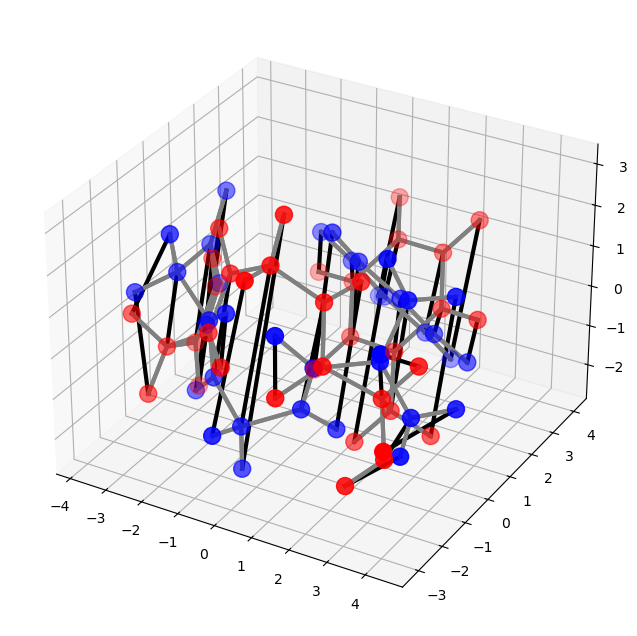

In [7]:
# first change the assignment to a permutation matrix
P = otm.tl.permutation_to_matrix(assignment)
# then use kabsch to get the aligned coordinates
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, P) 
#otm.pl.interactive_alignment_plot(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment = assignment, nameA = nameA, nameB = nameB, save = False)
otm.pl.plot_alignment(X_A, X_B_aligned, B_A, B_B, P)

Now let's align two water clusters 10-PP1 and 10-PP2 with cluster_alignment(). We need to specify the number of atoms in a water molecule and the method to represent a water molecule.

The number of candidate molecular level permutations is 77
The RMSD of the alignment is 0.6419754068934741


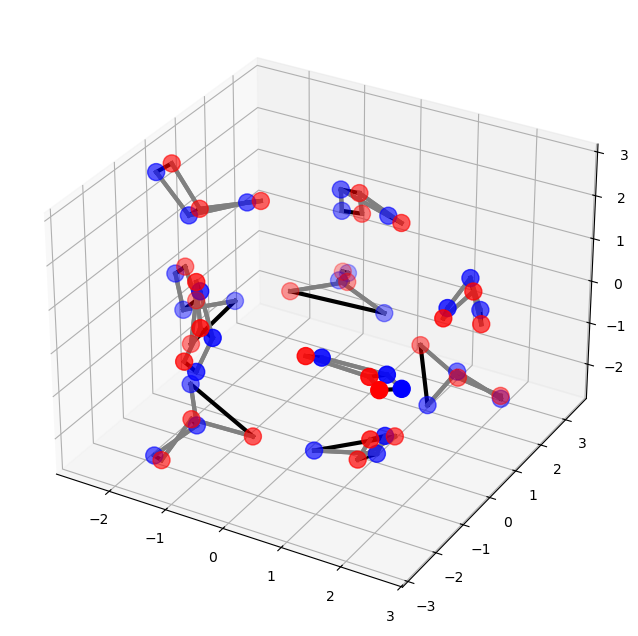

In [8]:
data_path = "../Data/Water-Clusters/"
nameA = '10-PP1.xyz'
nameB = '10-PP2.xyz'
molA = next(pybel.readfile('xyz', os.path.join(data_path, nameA)))
molB = next(pybel.readfile('xyz', os.path.join(data_path, nameB)))
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
n_atoms = 3
# specify we are aligning molecule clusters
assignment, rmsd_best = otm.tl.cluster_alignment(
    X_A, X_B, T_A, T_B, 
    case = 'molecule cluster', 
    n_trials = 100,
    n_atoms = n_atoms, 
    representative_option = 'center')
print('The RMSD of the alignment is', rmsd_best)
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, otm.tl.permutation_to_matrix(assignment))
#otm.pl.interactive_alignment_plot(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '10-PP1', '10-PP2', save=False)
otm.pl.plot_alignment(X_A, X_B_aligned, B_A, B_B, otm.tl.permutation_to_matrix(assignment))

We can also align clusters of the same atom with cluster_alignment()

The RMSD of the alignment is 0.21349832586653356


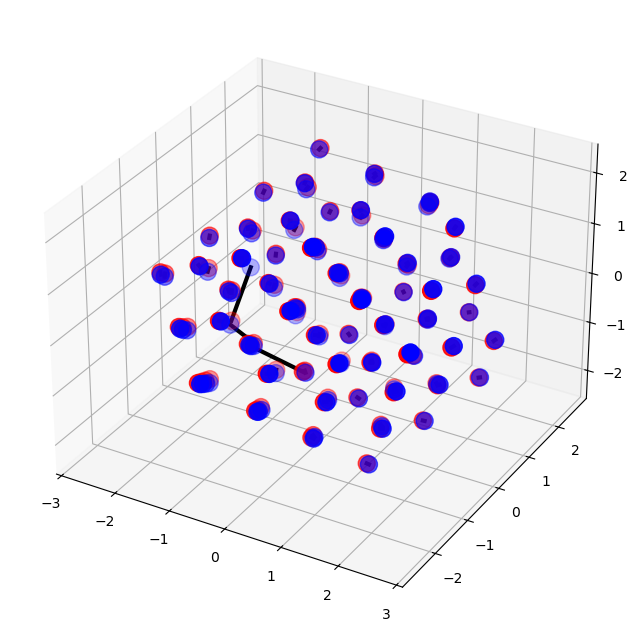

In [9]:
data_path = "../Data/Neon-Clusters/"
nameA = '100-1.xyz'
nameB = '100-2.xyz'
molA = next(pybel.readfile('xyz', os.path.join(data_path, nameA)))
molB = next(pybel.readfile('xyz', os.path.join(data_path, nameB)))
# T and B are only used for plotting
X_A, T_A, B_A = otm.tl.process_molecule(molA) 
X_B, T_B, B_B = otm.tl.process_molecule(molB)
p_list=np.arange(0.5, 5, 0.5)
assignment, rmsd_best, p_best = otm.tl.cluster_alignment(X_A = X_A, X_B = X_B, case = 'same element', p_list = p_list)
print('The RMSD of the alignment is', rmsd_best)
X_B_aligned, _, _ = otm.tl.kabsch(X_A, X_B, otm.tl.permutation_to_matrix(assignment))
#otm.pl.interactive_alignment_plot(X_A, X_B_aligned, T_A, T_B, B_A, B_B, assignment, '100-1', '100-2', save=False)
otm.pl.plot_alignment(X_A, X_B_aligned, B_A, B_B, otm.tl.permutation_to_matrix(assignment))